In [131]:
import os
import fileinput
import csv

import numpy as np

import datetime

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.cm as cm
import matplotlib.ticker as plticker
import matplotlib.dates as mdates

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [132]:
class cdat:
    def __init__(self):
        self.name = ''
        self.idx = []
        self.dte = []
        self.con = []
        self.rec = []
        self.ded = []
        self.gf = []
    def gfactor(self):
        if len(self.gf) == 0:
            self.gf = np.zeros_like(self.idx, dtype=float)
            for i in range(1,len(self.idx)):
                if(self.con[i-1] > 0):
                    self.gf[i] = float(self.con[i])/float(self.con[i-1])
        return self.gf

def readdata_wrd(path, dest):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                print(f'Column names are {", ".join(row)}')
                line_count += 1
            else:
    #             print(row)
                dest.idx.append(line_count-1)
                line_count += 1
                r = row[0].split('-')
                d = datetime.date(year=int(r[0]), month=int(r[1]),day=int(r[2]))
                dest.dte.append(d)
                dest.con.append(int(row[1]))
                dest.ded.append(int(row[3]))
#                 print(dest.idx[-1])
        print(f'Processed {line_count} lines.')
    dest.name = 'World'
    dest.idx=np.array(dest.idx)
    dest.dte=np.array(dest.dte)
    dest.con=np.array(dest.con)
    dest.ded=np.array(dest.ded)

def readdata_cnt(path, dest, cntname):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
    #             print(f'Column names are {", ".join(row)}')
                line_count += 1
            elif row[1] == cntname:
    #             print(row)
                dest.idx.append(line_count-1)
                line_count += 1
                r = row[0].split('-')
                d = datetime.date(year=int(r[0]), month=int(r[1]),day=int(r[2]))
                dest.dte.append(d)
                dest.con.append(int(row[2]))
                dest.ded.append(int(row[4]))
#                 print(dest.idx[-1])
#                 print(d, row[2])
            else:
                pass
        print(f'Processed {line_count} lines.')
    dest.name=cntname
    dest.idx=np.array(dest.idx)
    dest.dte=np.array(dest.dte)
    dest.con=np.array(dest.con)
    dest.ded=np.array(dest.ded)

In [145]:
clist = []

clist.append(cdat())
readdata_wrd('../data/worldwide-aggregated.csv', clist[-1])

for c in ['Poland', 'Italy', 'US', 'Germany', 'Spain', 'France', 'Japan', 'Czechia']:
    clist.append(cdat())
    readdata_cnt('../data/countries-aggregated.csv', clist[-1], c)
print('From: ', clist[0].dte[0], 'To', clist[0].dte[-1])

Column names are Date, Confirmed, Recovered, Deaths, Increase rate
Processed 83 lines.
Processed 83 lines.
Processed 83 lines.
Processed 83 lines.
Processed 83 lines.
Processed 83 lines.
Processed 83 lines.
Processed 83 lines.
Processed 83 lines.
From:  2020-01-22 To 2020-04-12


In [146]:
for c in clist:
    print("{0:>7}".format(c.name), len(c.idx))

  World 82
 Poland 82
  Italy 82
     US 82
Germany 82
  Spain 82
 France 82
  Japan 82
Czechia 82


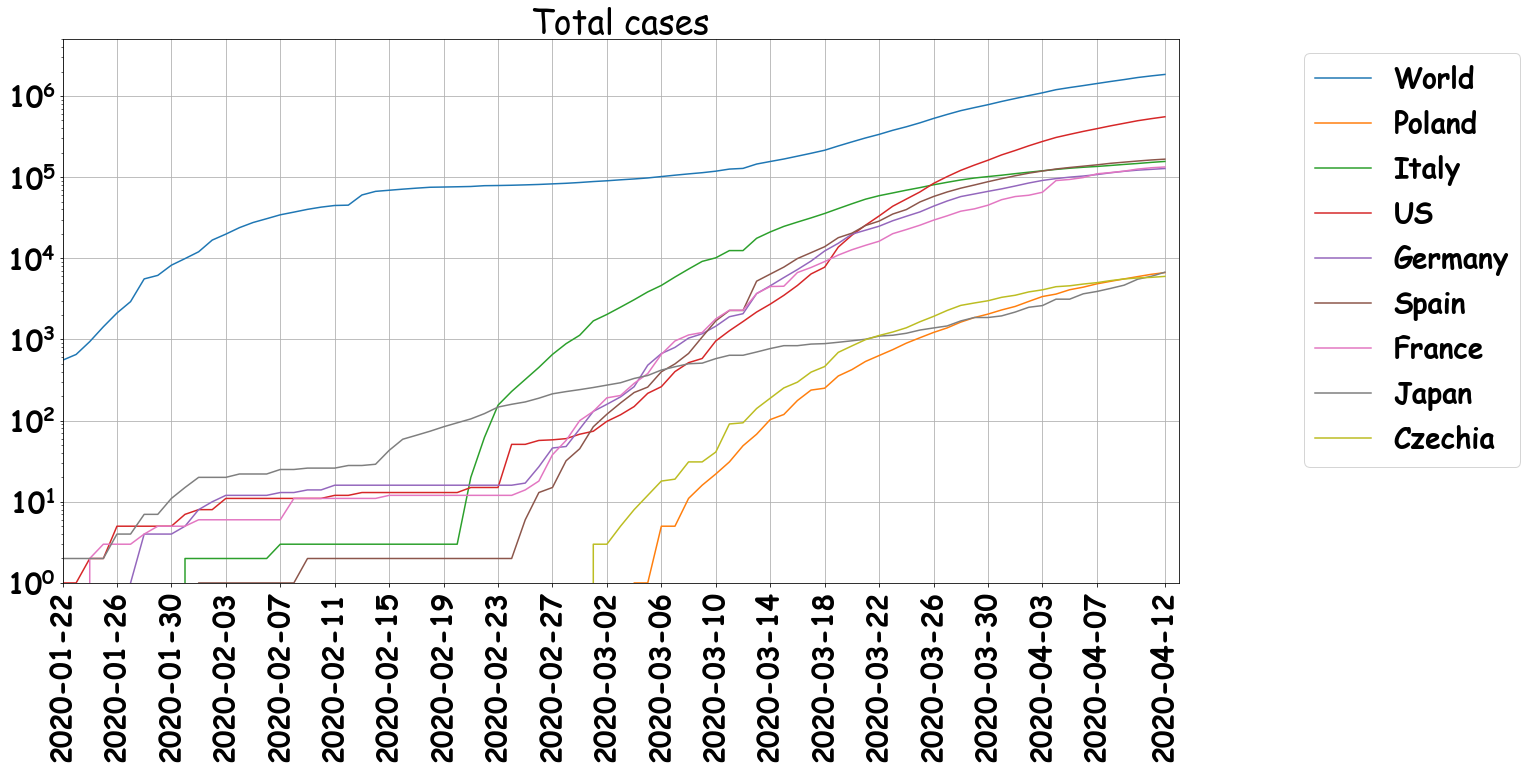

In [156]:
%matplotlib inline
font = {'family' : 'Comic Sans MS',
        'weight' : 'bold',
        'size'   : 28}
plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(20,10))

for c in clist:
    ax.plot(c.idx, c.con, label=c.name)
    
plt.title('Total cases')
plt.yscale('log')
plt.ylim(1,5e6)
plt.xlim(0, clist[0].idx[-1]+1)
plt.legend(bbox_to_anchor=(1.1, 1., 0, 0))

base = 4
lo = list(clist[0].idx[::base])
if lo[-1] != clist[0].idx[-1]:
    if clist[0].idx[-1]-1 == lo[-1]:
        lo[-1] = clist[0].idx[-1]
    else:
        lo.append(clist[0].idx[-1])
loc = plticker.FixedLocator(locs=lo) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(locator=loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels([clist[0].dte[i] for i in loc()], rotation=90)
plt.grid()

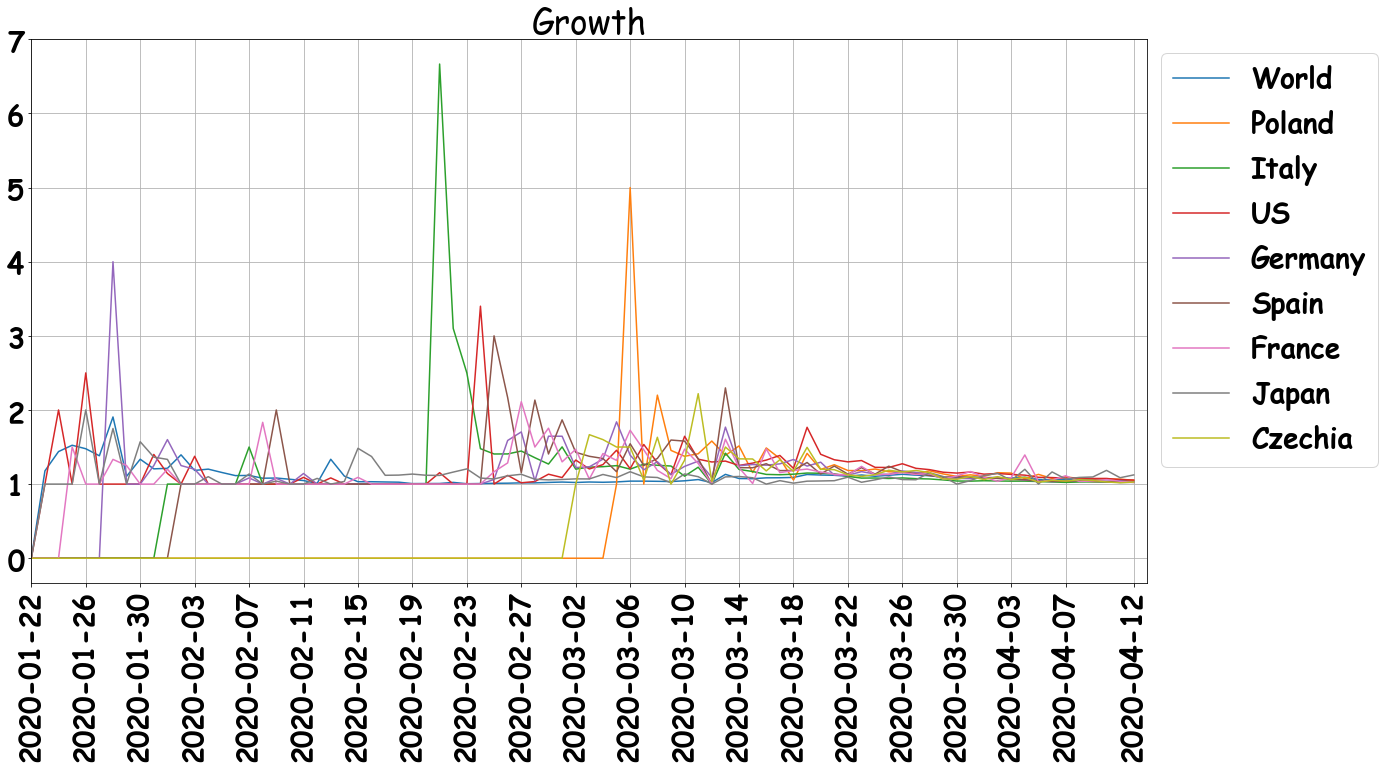

In [157]:
fig, ax = plt.subplots(figsize=(20,10))

for c in clist:
    ax.plot(c.idx, c.gfactor(), label=c.name)

plt.title('Growth')
plt.xlim(0, clist[0].idx[-1]+1)
# plt.yscale('log')
# plt.ylim(1,1e6)
plt.legend(bbox_to_anchor=(1, 1., 0, 0))

base = 4
lo = list(clist[0].idx[::base])
if lo[-1] != clist[0].idx[-1]:
    if clist[0].idx[-1]-1 == lo[-1]:
        lo[-1] = clist[0].idx[-1]
    else:
        lo.append(clist[0].idx[-1])
loc = plticker.FixedLocator(locs=lo) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(locator=loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels([clist[0].dte[i] for i in loc()], rotation=90)
plt.grid()

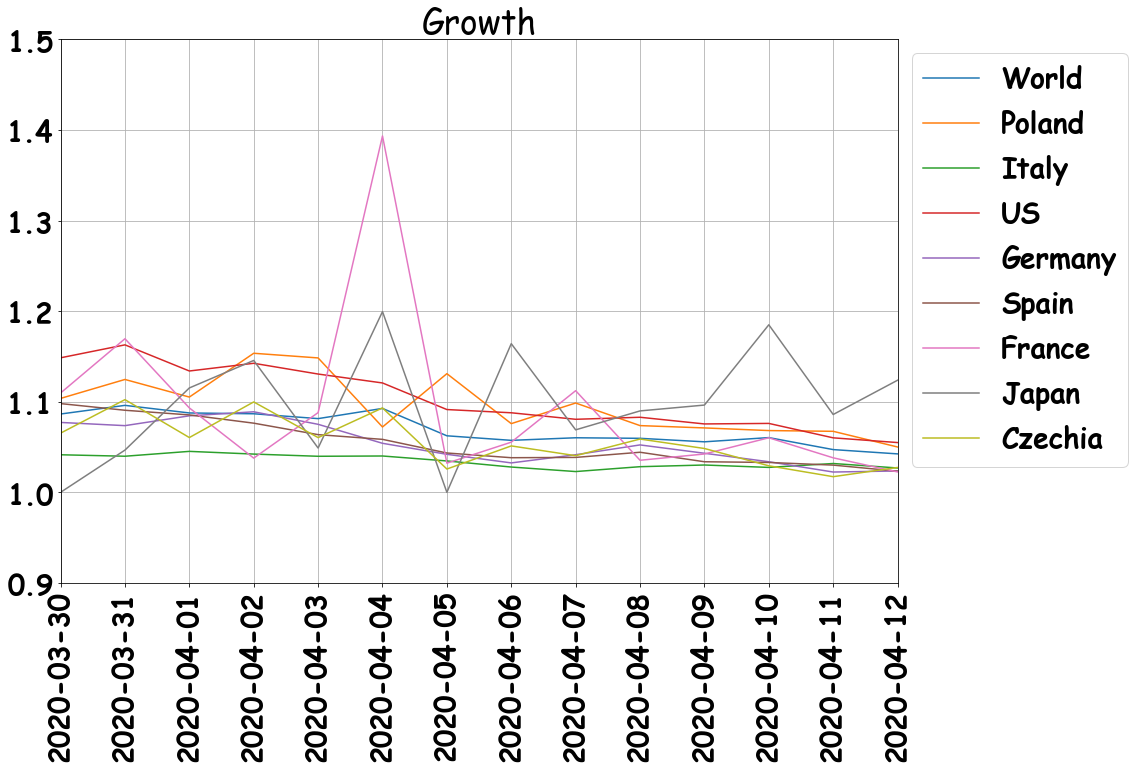

In [158]:
fig, ax = plt.subplots(figsize=(15,10))

for c in clist:
    ax.plot(c.idx, c.gfactor(), label=c.name)

plt.title('Growth')
plt.xlim(clist[0].idx[-14], clist[0].idx[-1])
plt.ylim(0.9,1.5)
plt.legend(bbox_to_anchor=(1, 1., 0, 0))

base = 1
lo = list(clist[0].idx[::base])
loc = plticker.FixedLocator(locs=lo) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(locator=loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels([clist[0].dte[i] for i in loc()], rotation=90)
plt.grid()

#### Growth averaged from first detected case

In [159]:
for d in clist:
    av = np.mean([x for x in d.gf if x])
    print("{0:>7}".format(d.name), av)

  World 1.1125353762981085
 Poland 1.3212401656813175
  Italy 1.243886159077022
     US 1.2079038171684249
Germany 1.200246084781845
  Spain 1.221863207392819
 France 1.1688116694236863
  Japan 1.114464124433965
Czechia 1.218408708724812


#### Growth averaged for last 14 days

In [160]:
for d in clist:
    av = np.mean([x for x in d.gf[-14:] if x])
    print("{0:>7}".format(d.name), round(av,3))

  World 1.07
 Poland 1.096
  Italy 1.034
     US 1.103
Germany 1.053
  Spain 1.054
 France 1.092
  Japan 1.098
Czechia 1.056


#### Growth last day:

In [161]:
for d in clist:
    print("{0:>7}".format(d.name), d.dte[-1], "{0:>8}".format(d.con[-1]), "{0:>6}".format(d.con[-1]-d.con[-2]), round(d.gf[-1],3))

  World 2020-04-12  1846679  75165 1.042
 Poland 2020-04-12     6674    318 1.05
  Italy 2020-04-12   156363   4092 1.027
     US 2020-04-12   555313  28917 1.055
Germany 2020-04-12   127854   2946 1.024
  Spain 2020-04-12   166831   3804 1.023
 France 2020-04-12   133670   2943 1.023
  Japan 2020-04-12     6748    743 1.124
Czechia 2020-04-12     5991    160 1.027


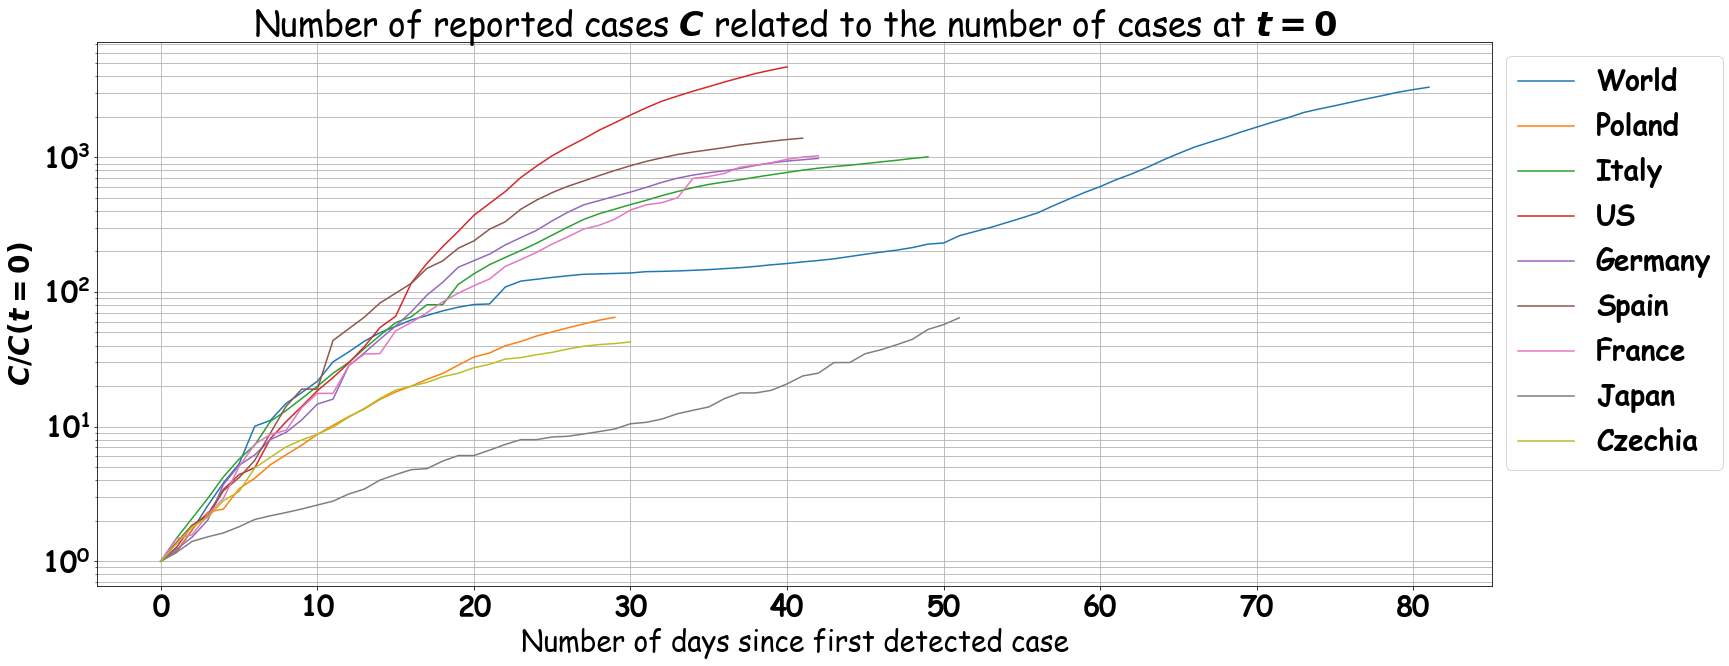

In [162]:
fig, ax = plt.subplots(figsize=(25,10))

for c in clist:
    con = np.array([x for x in c.con if x > 100])
    con = con/con[0]
    idx = range(0,len(con))
    plt.plot(idx, con, label=c.name)

plt.title('Number of reported cases $C$ related to the number of cases at $t=0$')
plt.xlabel('Number of days since first detected case')
plt.ylabel('$C/C(t=0)$')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 1., 0, 0))
plt.grid(which='both')

## Time it takes to multiply by 10

In [163]:
c = clist[1]
idx1 = next(i for i,x in enumerate(c.con) if x > 10)
idx2 = next(i for i,x in enumerate(c.con) if x > 100)
print(idx2-idx1)
idx1 = next(i for i,x in enumerate(c.con) if x > 100)
idx2 = next(i for i,x in enumerate(c.con) if x > 1000)
print(idx2-idx1)

6
11


In [171]:
exp = c.con[-1]
for i in range(1,30):
    exp *= 1.05
    exp = int(round(exp))
    date = datetime.date.today() + datetime.timedelta(days=i)
    print(date, exp)

2020-04-14 7008
2020-04-15 7358
2020-04-16 7726
2020-04-17 8112
2020-04-18 8518
2020-04-19 8944
2020-04-20 9391
2020-04-21 9861
2020-04-22 10354
2020-04-23 10872
2020-04-24 11416
2020-04-25 11987
2020-04-26 12586
2020-04-27 13215
2020-04-28 13876
2020-04-29 14570
2020-04-30 15298
2020-05-01 16063
2020-05-02 16866
2020-05-03 17709
2020-05-04 18594
2020-05-05 19524
2020-05-06 20500
2020-05-07 21525
2020-05-08 22601
2020-05-09 23731
2020-05-10 24918
2020-05-11 26164
2020-05-12 27472
